In [249]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [250]:
sequence = "MASQNRDPAATSVAAARKGAEPSGGAARGPVGKRLQQELMTLMMSGDKGISAFPESDNLFKWVGTIHGAAGTVYEDLRYKLSLEFPSGYPYNAPTVKFLTPCYHPNVDTQGNICLDILKEKWSALYDVRTILLSIQSLLGEPNIDSPLNTHAAELWKNPTAFKKYLQETYSKQVTSQEP"
chou_fasman_table = {
    'A': {'P_a': 1.42, 'P_b': 0.83, 'P_turn': 0.66, 'f_i': 0.06,  'f_i1': 0.076, 'f_i2': 0.035, 'f_i3': 0.058},
    'R': {'P_a': 0.98, 'P_b': 0.93, 'P_turn': 0.95, 'f_i': 0.070, 'f_i1': 0.106, 'f_i2': 0.099, 'f_i3': 0.085},
    'D': {'P_a': 1.01, 'P_b': 0.54, 'P_turn': 1.46, 'f_i': 0.147, 'f_i1': 0.110, 'f_i2': 0.179, 'f_i3': 0.081},
    'N': {'P_a': 0.67, 'P_b': 0.89, 'P_turn': 1.56, 'f_i': 0.161, 'f_i1': 0.083, 'f_i2': 0.191, 'f_i3': 0.091},
    'C': {'P_a': 0.70, 'P_b': 1.19, 'P_turn': 1.19, 'f_i': 0.149, 'f_i1': 0.050, 'f_i2': 0.117, 'f_i3': 0.128},
    'E': {'P_a': 1.39, 'P_b': 1.17, 'P_turn': 0.74, 'f_i': 0.056, 'f_i1': 0.060, 'f_i2': 0.077, 'f_i3': 0.064},
    'Q': {'P_a': 1.11, 'P_b': 1.10, 'P_turn': 0.98, 'f_i': 0.074, 'f_i1': 0.098, 'f_i2': 0.037, 'f_i3': 0.098},
    'G': {'P_a': 0.57, 'P_b': 0.75, 'P_turn': 1.56, 'f_i': 0.102, 'f_i1': 0.085, 'f_i2': 0.190, 'f_i3': 0.152},
    'H': {'P_a': 1.00, 'P_b': 0.87, 'P_turn': 0.95, 'f_i': 0.140, 'f_i1': 0.047, 'f_i2': 0.093, 'f_i3': 0.054},
    'I': {'P_a': 1.08, 'P_b': 1.60, 'P_turn': 0.47, 'f_i': 0.043, 'f_i1': 0.034, 'f_i2': 0.013, 'f_i3': 0.056},
    'L': {'P_a': 1.41, 'P_b': 1.30, 'P_turn': 0.59, 'f_i': 0.061, 'f_i1': 0.025, 'f_i2': 0.036, 'f_i3': 0.070},
    'K': {'P_a': 1.14, 'P_b': 0.74, 'P_turn': 1.01, 'f_i': 0.055, 'f_i1': 0.115, 'f_i2': 0.072, 'f_i3': 0.095},
    'M': {'P_a': 1.45, 'P_b': 1.05, 'P_turn': 0.60, 'f_i': 0.068, 'f_i1': 0.082, 'f_i2': 0.014, 'f_i3': 0.055},
    'F': {'P_a': 1.13, 'P_b': 1.38, 'P_turn': 0.60, 'f_i': 0.059, 'f_i1': 0.041, 'f_i2': 0.065, 'f_i3': 0.065},
    'P': {'P_a': 0.57, 'P_b': 0.55, 'P_turn': 1.52, 'f_i': 0.102, 'f_i1': 0.301, 'f_i2': 0.034, 'f_i3': 0.068},
    'S': {'P_a': 0.77, 'P_b': 0.75, 'P_turn': 1.43, 'f_i': 0.120, 'f_i1': 0.139, 'f_i2': 0.125, 'f_i3': 0.106},
    'T': {'P_a': 0.83, 'P_b': 1.19, 'P_turn': 0.96, 'f_i': 0.086, 'f_i1': 0.108, 'f_i2': 0.065, 'f_i3': 0.079},
    'W': {'P_a': 1.08, 'P_b': 1.37, 'P_turn': 0.96, 'f_i': 0.077, 'f_i1': 0.013, 'f_i2': 0.064, 'f_i3': 0.167},
    'Y': {'P_a': 0.69, 'P_b': 1.47, 'P_turn': 1.14, 'f_i': 0.082, 'f_i1': 0.065, 'f_i2': 0.114, 'f_i3': 0.125},
    'V': {'P_a': 1.06, 'P_b': 1.70, 'P_turn': 0.50, 'f_i': 0.062, 'f_i1': 0.048, 'f_i2': 0.028, 'f_i3': 0.053}
}
sse_data = [
    ("Helix", 30, 45),
    ("Beta strand", 50, 54),
    ("Beta strand", 61, 68),
    ("Beta strand", 78, 84),
    ("Turn", 87, 91),
    ("Beta strand", 95, 100),
    ("Beta strand", 111, 113),
    ("Helix", 116, 118),
    ("Turn", 119, 121),
    ("Helix", 128, 140),
    ("Helix", 150, 155),
    ("Helix", 159, 172)
]
sequence_length = len(sequence)

In [251]:
def get_true_sequence(data):
    sequence = "_" * sequence_length
    for structure, start, end in data:
        if structure == "Helix":
            structure_letter = "H"
        elif structure == "Beta strand":
            structure_letter = "E"
        elif structure == "Turn":
            structure_letter = "T"
        else:
            structure_letter = "U"
        for i in range(start, end + 1):
            sequence = sequence[:i] + structure_letter + sequence[i + 1:]
    for j in range(sequence_length):
        if sequence[j] == "_":
            sequence = sequence[:j] + "U" + sequence[j + 1:]
    return sequence

In [252]:
true_sequence = get_true_sequence(sse_data)
print(true_sequence)

UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUHHHHHHHHHHHHHHHHUUUUEEEEEUUUUUUEEEEEEEEUUUUUUUUUEEEEEEEUUTTTTTUUUEEEEEEUUUUUUUUUUEEEUUHHHTTTUUUUUUHHHHHHHHHHHHHUUUUUUUUUHHHHHHUUUHHHHHHHHHHHHHHUUUUUU


In [253]:
def predict_alpha_helices(sequence, chou_fasman_table):
    alpha_helices = []

    def is_helix_forming(segment):
        return sum(chou_fasman_table[residue]['P_a'] > 1 for residue in segment) >= 4

    def extend_helix(start, end):
        # Extend to the right
        right_pos = end + 1
        while right_pos != sequence_length:
            counter_right = sum(chou_fasman_table[sequence[k]]['P_a'] < 1 for k in range(max(0, right_pos - 3), right_pos+1))
            if counter_right == 4:
                end = right_pos - 4
                break
            right_pos += 1

        # Extend to the left
        left_pos = start - 1
        while left_pos != -1:
            counter_left = sum(chou_fasman_table[sequence[k]]['P_a'] < 1 for k in range(left_pos, min(sequence_length, left_pos + 4)))
            if counter_left == 4:
                start = left_pos + 4
                break
            left_pos -= 1

        return start, end

    for i in range(sequence_length - 5):
        segment = sequence[i:i+6]
        if is_helix_forming(segment):
            start, end = extend_helix(i, i + 5)
            alpha_helices.append((start, end))

    return alpha_helices

def predict_beta_sheets(sequence, chou_fasman_table):
    beta_sheets = []

    def is_sheet_forming(segment):
        return sum(chou_fasman_table[residue]['P_b'] > 1 for residue in segment) >= 4

    def extend_sheet(start, end):
        # Extend to the right
        right_pos = end + 1

        while right_pos != sequence_length:
            counter_right = sum(chou_fasman_table[sequence[k]]['P_b'] < 1 for k in range(max(0, right_pos - 3), right_pos+1))
            if counter_right == 4:
                end = right_pos - 4
                break
            right_pos += 1

        # Extend to the left
        left_pos = start - 1
        while left_pos != -1:
            counter_left = sum(chou_fasman_table[sequence[k]]['P_b'] < 1 for k in range(left_pos, min(sequence_length, left_pos + 4)))
            if counter_left == 4:
                start = left_pos + 4
                break
            left_pos -= 1

        return start, end

    for i in range(sequence_length - 5):
        segment = sequence[i:i+6]
        if is_sheet_forming(segment):
            start, end = extend_sheet(i, i + 5)
            beta_sheets.append((start, end))

    return beta_sheets


def predict_turns(sequence, chou_fasman_table):
    turns = []

    for i in range(sequence_length - 3):
        segment = sequence[i:i+4]
        P_bend = chou_fasman_table[segment[0]]['f_i'] * chou_fasman_table[segment[1]]['f_i1'] * chou_fasman_table[segment[2]]['f_i2'] * chou_fasman_table[segment[3]]['f_i3']
        P_turn_avg = sum([chou_fasman_table[residue]['P_turn'] for residue in segment]) / 4
        sum_P_turn = sum([chou_fasman_table[residue]['P_turn'] for residue in segment])
        sum_P_alpha = sum([chou_fasman_table[residue]['P_a'] for residue in segment])
        sum_P_beta = sum([chou_fasman_table[residue]['P_b'] for residue in segment])
        
        if  (P_bend > 0.000075) and (P_turn_avg  > 1) and (sum_P_turn > sum_P_alpha) and (sum_P_turn > sum_P_beta):

            turns.append((i, i + 3))

    return turns


In [254]:
alpha_helices = predict_alpha_helices(sequence, chou_fasman_table)
beta_sheets = predict_beta_sheets(sequence, chou_fasman_table)

print(len(alpha_helices))
print(len(beta_sheets))
print("Predicted alpha-helices:", alpha_helices)
print("Predicted beta-sheets:", beta_sheets)

alpha_helices = list(set(alpha_helices))
beta_sheets = list(set(beta_sheets))

alpha_helices = sorted(alpha_helices, key=lambda x: x[0])
beta_sheets = sorted(beta_sheets, key=lambda x: x[0])

print("Predicted alpha-helices:", alpha_helices)
print("Predicted beta-sheets:", beta_sheets)


77
59
Predicted alpha-helices: [(8, 20), (9, 20), (10, 20), (11, 20), (12, 20), (13, 20), (14, 20), (15, 20), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (25, 84), (92, 98), (92, 98), (92, 98), (92, 98), (103, 116), (103, 117), (103, 118), (103, 119), (103, 120), (103, 121), (103, 122), (103, 123), (103, 124), (103, 125), (103, 126), (103, 127), (103, 128), (103, 131), (103, 132), (103, 134), (103, 135), (103, 136), (103, 137), (103, 138), (103, 139), (103, 140), (103, 154), (103, 155), (103, 156), (103, 157), (103, 158), (103, 163), (103, 164), (103, 165), (103, 166), (103, 167), (103, 168), (103, 176), (103, 177)]
Predicted beta-sheets: [(30, 43), (30, 43), (30, 43), (30, 43), (30, 43), (30, 43), (30, 43), (30, 43), (30, 43), (49, 65), (49, 6

In [255]:
def consolidate_structures(structures):
    consolidated = []
    current_start, current_end = structures[0]

    for start, end in structures[1:]:
        if start <= current_end + 1:
            # Extend the current helix
            current_end = max(current_end, end)
        else:
            # Save the current helix and start a new one
            consolidated.append((current_start, current_end))
            current_start, current_end = start, end

    # Add the last helix
    consolidated.append((current_start, current_end))

    return consolidated

In [256]:
alpha_helices = consolidate_structures(alpha_helices)
beta_sheets = consolidate_structures(beta_sheets)

print("alpha-helices:", alpha_helices)
print("beta-sheets:", beta_sheets)

alpha-helices: [(8, 20), (25, 84), (92, 98), (103, 177)]
beta-sheets: [(30, 43), (49, 65), (71, 178)]


In [257]:
def find_overlaps(alpha_helices, beta_sheets, sequence_length):
    alpha_booleans = [False] * sequence_length
    beta_booleans = [False] * sequence_length
    for start, end in alpha_helices:
        alpha_booleans[start:end+1] = [True] * (end - start + 1)
    for start, end in beta_sheets:
        beta_booleans[start:end+1] = [True] * (end - start + 1)
    overlaps = []
    start = -1
    end = -1
    for i in range(sequence_length):
        if alpha_booleans[i] and beta_booleans[i]:
            if start == -1:
                start = i
            end = i
        else:
            if start != -1:
                overlaps.append((start, end))
                start = -1
                end = -1
    if start != -1:
        overlaps.append((start, end))
    return overlaps

In [258]:
overlaps = find_overlaps(alpha_helices, beta_sheets, sequence_length)
print("Overlaps:", overlaps)

Overlaps: [(30, 43), (49, 65), (71, 84), (92, 98), (103, 177)]


In [259]:
def compare_structure_propensity(start, end, chou_fasman_table, sequence):
    def sum_propensity(start, end, structure_type):
        if structure_type == 'alpha':
            return sum(chou_fasman_table[sequence[i]]['P_a'] for i in range(start, end + 1))
        elif structure_type == 'beta':
            return sum(chou_fasman_table[sequence[i]]['P_b'] for i in range(start, end + 1))
        else:
            return 0
    
    sum_P_alpha = sum_propensity(start, end, 'alpha')
    sum_P_beta = sum_propensity(start, end, 'beta')

    return 'alpha' if sum_P_alpha > sum_P_beta else 'beta'


alpha_line = ['-'] * sequence_length
for start, end in alpha_helices:
    alpha_line[start:end+1] = ['H'] * (end - start + 1)
beta_line = ['-'] * sequence_length
for start, end in beta_sheets:
    beta_line[start:end+1] = ['E'] * (end - start + 1)
overlap_line = ['-'] * sequence_length

for start, end in overlaps:
    structure_type = compare_structure_propensity(start, end, chou_fasman_table, sequence)
    if structure_type == 'alpha':
        overlap_line[start:end+1] = ['H'] * (end - start + 1)
        beta_line[start:end+1] = ['-'] * (end - start + 1)
    else:
        overlap_line[start:end+1] = ['E'] * (end - start + 1)
        alpha_line[start:end+1] = ['-'] * (end - start + 1)

counter = 0
for i in range(len(alpha_line)):
    if alpha_line[i] == 'A':
        counter += 1
    else:
        if (counter != 0 and counter < 5):
            for j in range(counter):
                alpha_line[i-j-1] = '-'
        counter = 0
counter = 0
for i in beta_line:
    if i == 'E':
        counter += 1
    else:
        if (counter != 0 and counter < 5):
            for j in range(counter):
                beta_line[i-j-1] = '-'
        counter = 0
for i in range(len(alpha_line)):
    if alpha_line[i] == 'H':
        overlap_line[i] = 'H'
for i in range(len(beta_line)):
    if beta_line[i] == 'E':
        overlap_line[i] = 'E'        
print("".join(overlap_line))

--------HHHHHHHHHHHHH----HHHHHHHHHHHHHHHHHHHHHHHHEEEEEEEEEEEEEEEEEHHHHHEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE


In [260]:
print("Final alpha-helices:", alpha_helices)
print("Final beta-sheets:", beta_sheets)

Final alpha-helices: [(8, 20), (25, 84), (92, 98), (103, 177)]
Final beta-sheets: [(30, 43), (49, 65), (71, 178)]


In [261]:
turns = predict_turns(sequence, chou_fasman_table)
turns = consolidate_structures(turns)
print("Predicted turns:", turns)

Predicted turns: [(2, 7), (16, 34), (43, 49), (52, 58), (84, 91), (99, 111), (140, 151), (155, 160), (169, 172)]


In [262]:
labels = overlap_line
for start, end in turns:
    labels[start:end+1] = (end - start + 1) * ['T']

counter = 0
for i in range(len(labels)):
    if labels[i] == 'E':
        counter += 1
    else:
        if (counter != 0 and counter < 5):
            for j in range(counter):
                labels[i-j-1] = '-'
        counter = 0

for i in range(len(labels)):
    if labels[i] == 'H':
        counter += 1
    else:
        if (counter != 0 and counter < 5):
            for j in range(counter):
                labels[i-j-1] = '-'
        counter = 0

print(sequence.count('T'))
print("Labels:", labels)
print("".join(labels))

12
Labels: ['-', '-', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', '-', '-', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'H', 'H', 'H', 'H', 'H', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', '-', '-', '-', 'T', 'T', 'T', 'T', 'T', 'T', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'T', 'T', 'T', 'T', 'E', 'E', 'E', 'E', 'E', 'E']
--TTTTTTHHHHHHHHTTTTTTTTTTTTTTTTTTTHHHHHHHHTTTTTTT--TTTTTTTEEEEEEEHHHHHEEEEEEEEEEEEETTTTTTTTE

In [263]:
def create_structure_summary(sequence_length, alpha_helices, beta_sheets, turns):
    structure_summary = []
    last_end = -1

    all_structures = [('alpha', start, end) for start, end in alpha_helices] + \
                     [('beta', start, end) for start, end in beta_sheets] + \
                     [('turn', start, end) for start, end in turns]

    # Check that start and end points are integers
    for structure in all_structures:
        if not (isinstance(structure[1], int) and isinstance(structure[2], int)):
            raise TypeError("Start and end points of structures must be integers.")

    all_structures.sort(key=lambda x: x[1])

    def add_unknown_region(start, end):
        if start <= end:
            structure_summary.append(('unknown', start, end))

    for structure_type, start, end in all_structures:
        if start > last_end + 1:
            add_unknown_region(last_end + 1, start - 1)
        structure_summary.append((structure_type, start, end))
        last_end = max(last_end, end)

    add_unknown_region(last_end + 1, sequence_length)

    return structure_summary


alpha_helices = alpha_helices
beta_sheets = beta_sheets
turns = turns

structure_summary = create_structure_summary(sequence_length, alpha_helices, beta_sheets, turns)

# Print the structure summary
for structure_type, start, end in structure_summary:
    print(f"Structure: {structure_type}, Start: {start}, End: {end}")

Structure: unknown, Start: 0, End: 1
Structure: turn, Start: 2, End: 7
Structure: alpha, Start: 8, End: 20
Structure: turn, Start: 16, End: 34
Structure: alpha, Start: 25, End: 84
Structure: beta, Start: 30, End: 43
Structure: turn, Start: 43, End: 49
Structure: beta, Start: 49, End: 65
Structure: turn, Start: 52, End: 58
Structure: beta, Start: 71, End: 178
Structure: turn, Start: 84, End: 91
Structure: alpha, Start: 92, End: 98
Structure: turn, Start: 99, End: 111
Structure: alpha, Start: 103, End: 177
Structure: turn, Start: 140, End: 151
Structure: turn, Start: 155, End: 160
Structure: turn, Start: 169, End: 172
Structure: unknown, Start: 179, End: 179


In [264]:
def generate_labels(sequence_length, structure_data):
    labels = ["Unknown"] * sequence_length

    for structure_type, start, end in structure_data:
        # Ensure the range is within the sequence length
        start = max(0, start)
        end = min(end, sequence_length - 1)

        for i in range(start, end + 1):
            # Use provided structure type for true data
            labels[i] = structure_type

    return labels

# True labels from sse_data
true_labels = generate_labels(sequence_length, sse_data)
print(true_labels)
predicted_labels = []
for i in labels:
    if i == 'H':
        predicted_labels.append('Helix')
    elif i == 'E':
        predicted_labels.append('Beta strand')
    elif i == 'T':
        predicted_labels.append('Turn')
    else:
        predicted_labels.append('Unknown')
print("".join(labels))

['Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Helix', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Beta strand', 'Beta strand', 'Beta strand', 'Beta strand', 'Beta strand', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Beta strand', 'Beta strand', 'Beta strand', 'Beta strand', 'Beta strand', 'Beta strand', 'Beta strand', 'Beta strand', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Beta strand', 'Beta strand', 'Beta strand', 'Beta strand', 'Beta strand', 'Beta strand', 'Beta strand', 'Unknown', 'Unkn

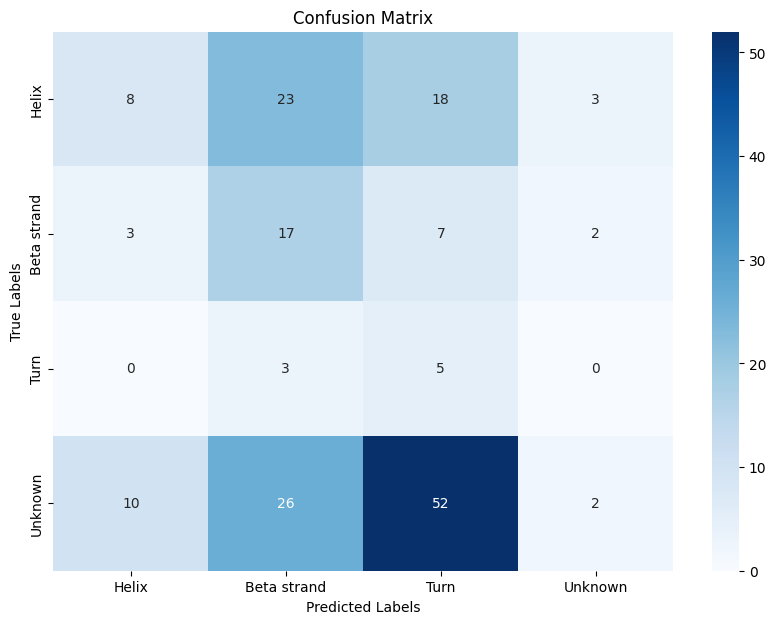


Classification Report:
               precision    recall  f1-score   support

       Helix       0.38      0.15      0.22        52
 Beta strand       0.25      0.59      0.35        29
        Turn       0.06      0.62      0.11         8
     Unknown       0.29      0.02      0.04        90

    accuracy                           0.18       179
   macro avg       0.24      0.35      0.18       179
weighted avg       0.30      0.18      0.15       179



In [265]:
# Assuming true_labels and predicted_labels are defined and contain the true and predicted labels
cm = confusion_matrix(true_labels, predicted_labels, labels=["Helix", "Beta strand", "Turn", "Unknown"])

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Helix", "Beta strand", "Turn", "Unknown"], yticklabels=["Helix", "Beta strand", "Turn", "Unknown"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print a classification report for more details
print("\nClassification Report:\n", classification_report(true_labels, predicted_labels, labels=["Helix", "Beta strand", "Turn", "Unknown"]))
